In [136]:
import numpy as  np
%matplotlib inline
import matplotlib.pyplot as plt
import random
from IPython import display
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
def linreg(X, y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
def run_perceptron(x_train, y_train, w=None, max_iter=100):
    if w is None:
        w = np.zeros((3,))
    nb_updates = 0
    for cur_iter in range(max_iter):
        y_pred = (np.dot(x_train, w) > 0) * 2 - 1
        ind = np.arange(len(y_train))[y_pred != y_train]
        if len(ind) == 0:
            break
        i = np.random.choice(ind)
        w += x_train[i] * y_train[i]
        nb_updates += 1
    return w, nb_updates

# complexity of the linear model learning algorithm

$X$ is  $(N, p)$

$y$ is $(N,)$

$X^T X$ $(N,p)x(p, N)$ which has complexity $O(N^2p)$ (for loop over N, for loop over N, for loop over p)

$(X^T X)^{-1}$ is $O(N^3)$

$(X^T X)^{-1} y$ is $O(N^2)$

total : 

$O(N^2p) + O(N^{3}) + O(N^{2})$

Source : <https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations#Matrix_algebra>

## Q1& Q2

In [68]:
mu = 0.5
nb_coins = 1000
nb_times = 10
nb_repeats = 100000
samples = np.random.uniform(size=(nb_repeats, nb_coins, nb_times)) <= mu
s = samples.mean(axis=2)
v1 = s[:, 0]
vrand = s[np.arange(nb_repeats), np.random.randint(0, nb_coins, size=nb_repeats)]
vmin = s.min(axis=1)

In [70]:
print(vrand.mean())
print(vmin.mean())
print(v1.mean())

0.499623
0.037668
0.499812


## Q1 :  closest is b

## Q2 : c1 and crand

## Q3

modelisation of the problem

- $h$ is a random variable denoting our hypothesis function.
- $f$ is a random variable denoting our real function.
- $f'$ is a random variable denoting the noisified version of the real function

We have:

- $P(h=1|f=1) = 1 - \mu$
- $P(h=0|f=0) = 1 - \mu$
- $P(f'=1|f=1) = \lambda$
- $P(f'=0|f=0) = \lambda$

we want to find : $P(h \neq f') = P(h=1, f'=0) + P(h=1, f'=1)$

just to verify for $P(h \neq f), which is equal to $\mu$

$P(h \neq f) = P(h=1, f=0) + P(h=0, f=1) = P(h=1|f=0)P(f=0) + P(h=0|f=1)P(f=1) = \frac{1}{2}\mu + \frac{1}{2}\mu = \mu$

now $P(h \neq f')$.


$P(h \neq f') = P(h=1, f'=0) + P(h=0, f'=1)$

$= P(h=1, f'=0|f=0)P(f=0) + P(h=1, f'=0|f=1)P(f=1) + P(h=0, f'=1|f=0)P(f=0) +  P(h=0, f'=1|f=1)P(f=1) $

$= P(h=1|f=0)P(f'=0|f=0)P(f=0)+ P(h=1|f=1)P(f'=0|f=1)P(f=1)+ P(h=0|f=0)P(f'=1|f=0)P(f=1) + P(h=0|f=1)P(f'=1|f=1)P(f=1)$

$ = \frac{1}{2}\mu \lambda + \frac{1}{2}(1-\mu)(1-\lambda) + \frac{1}{2}\mu \lambda + \frac{1}{2})(1-\mu)(1-\lambda)$

$= \mu \lambda + (1-\mu)(1-\lambda)$

## Q4

well if $\lambda = 0.5$ then $\mu$ cancels, b is the answer.


In [65]:
## q3 verification
size = 100000
x = np.random.uniform(size=size) <= 0.6
f = (x > 0.4)

mu = 0.3
r = np.random.uniform(size=size) <= (1 - mu)
h = f * r + (1 - f) * (1 - r)

print((h!=f).mean())

lambda_ = 0.1
r = np.random.uniform(size=size)<= (lambda_)
fprime = f * r + (1 - f) * (1 - r)
print((fprime != f).mean())
print((fprime != h).mean(), mu*lambda_ + (1-mu)*(1-lambda_))

0.29913
0.89948
(0.66029000000000004, 0.66)


## linear regression

In [98]:
def generate(nb=10):
    x1, y1, x2, y2 = np.random.uniform(-1, 1, size=4)
    m = (y2-y1)/(x2-x1)
    p = y1 - m * x1
    x_train = np.random.uniform(-1, 1, size=(nb, 2))
    a = m
    b = -1
    c = p
    w = np.array([a, b])
    y_train = (np.dot(x_train, w) + c > 0) * 2 - 1
    return x_train, y_train

def viz(x_train, y_train, w, fig):
    x1, x2 = x_train[:, 0].min(), x_train[:, 0].max()
    y1, y2 = get_y(x1, x2, w[0], w[1], w[2])
    ax = fig.add_subplot(111)
    ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
    plt.plot([x1, x2], [y1, y2])
    
def get_y(x1, x2, a, b, c):
    y1 = (- c - a * x1) / b
    y2 = (- c - a * x2) / b
    return y1, y2
def insert_ones(x):
    x = np.concatenate((x, np.ones((len(x), 1))), axis=1)
    return x

('q5', 0.038670000000000003)
('q6', 0.047786000000000009)
('q7', 3.9470000000000001)
(281, 0)


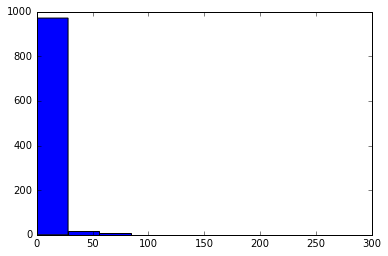

In [141]:
nb_trials = 1000
nb_iters = []
e_ins = []
e_outs = []
nb_iters = []
nb_train = 100
nb_test = 1000
for i in range(nb_trials):
    x, y = generate(nb=nb_train + nb_test)
    x = insert_ones(x)
    x_train, y_train = x[0:nb_train], y[0:nb_train]
    x_test, y_test = x[nb_train:], y[nb_train:]
    w = linreg(x_train, y_train)
    
    y_pred = predict(x_train, w)
    e_in = (y_pred != y_train).mean()
    e_ins.append(e_in)
    
    y_pred = predict(x_test, w)
    e_out = (y_pred != y_test).mean()
    
    e_outs.append(e_out)
        
    x_train_perceptron, y_train_perceptron = x_train[0:10], y_train[0:10]
    #x_train_perceptron = insert_ones(x_train_perceptron)
    max_iter = 10000
    w_perceptron, nb_iter = run_perceptron(x_train_perceptron, y_train_perceptron, w=w.copy(), max_iter=max_iter)
    assert nb_iter < max_iter
    nb_iters.append(nb_iter)
    
print('q5', np.mean(e_ins))
print('q6', np.mean(e_outs))
print('q7', np.mean(nb_iters))

plt.hist(nb_iters)
print(np.max(nb_iters), np.min(nb_iters))

## Q5 : closest is 0.01
## Q6 : closest is 0.01
## Q7 :  closest is 15

# Nonlinear transformation

In [105]:
from collections import defaultdict
def generate2(nb=100, noise=0):
    x = np.random.uniform(-1, 1, size=(nb, 2))
    y = ((x[:, 0]**2 + x[:, 1]**2 - 0.6)>0) * 2 - 1
    if noise:
        subset = np.arange(len(y))
        np.random.shuffle(subset)
        subset = subset[0:len(y)*noise]
        y_noise = y.copy()
        y_noise[subset] = -y_noise[subset]
    else:
        y_noise = y
    return x, y, y_noise

def predict(x, w):
    return (np.dot(x, w)>0) * 2 - 1

def augment(x):
    x_feat = np.empty((len(x), 6))
    x_feat[:, 0] = 1
    x_feat[:, 1] = x[:, 0]
    x_feat[:, 2] = x[:, 1]
    x_feat[:, 3] = x[:, 0] * x[:, 1]
    x_feat[:, 4] = x[:, 0]**2
    x_feat[:, 5] = x[:, 1]**2
    return x_feat

g1 = [-1, -0.05, 0.08, 0.13, 1.5, 1.5]
g2 = [-1, -0.05, 0.08, 0.13, 1.5, 1.5]
g3 = [-1, -0.05, 0.08, 0.13, 15, 1.5]
g4 = [-1, -1.5, 0.08, 0.13, 0.05, 0.05]
g5 = [-1, -0.05, 0.08, 1.5, 0.15, 0.15]
G = [g1, g2, g3 ,g4, g5]
nb_trials = 1000
e_ins = []
e_ins_nonlinear = []
e_outs = []
count = defaultdict(int)
for _ in range(nb_trials):
    
    # generate data
    x_train, y_train, y_train_noise = generate2(nb=1000, noise=0.1)
    x_train_features = augment(x_train)
    x_train_features_linear = x_train_features[:, 0:3].copy()
    x_test, y_test, y_test_noise = generate2(nb=1000, noise=0.1)
    x_test_features = augment(x_test)
    

    # E_in linear regression
    w1 = linreg(x_train_features_linear, y_train_noise)
    y_pred = predict(x_train_features_linear, w1)
    e_in = (y_pred != y_train_noise).mean()
    e_ins.append(e_in)
    # E_in linear regression with nonlinear features
    w2 = linreg(x_train_features, y_train_noise)    
    y_pred = predict(x_train_features, w2)
    e_in = (y_pred != y_train_noise).mean()
    e_ins_nonlinear.append(e_in)
    
    y_pred_test = predict(x_test_features, w2)
    e_out = (y_pred_test != y_test_noise).mean()
    e_outs.append(e_out)
    
    # get closest hypothesis from G
    E = []
    for g in G:
        y_pred = predict(x_test_features, g)
        e = (y_pred_test != y_pred).mean()
        E.append(e)
    count[np.argmin(E)] += 1
print('e_in', np.mean(e_ins))
print('e_in non linear', np.mean(e_ins_nonlinear))
print('e_out non linear', np.mean(e_outs))
print(count)

/home/ubuntu/miniconda2/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


('e_in', 0.50444299999999997)
('e_in non linear', 0.12374)
('e_out non linear', 0.12598200000000001)
defaultdict(<type 'int'>, {0: 1000})


## Q8 : closest is 0.5
## Q9 : closest is answer a
## Q10 :closest answer is 0.1